Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 135ms/step - accuracy: 0.7325 - loss: 0.5225 - val_accuracy: 0.8230 - val_loss: 0.4125
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 134ms/step - accuracy: 0.8772 - loss: 0.3081 - val_accuracy: 0.8670 - val_loss: 0.3164
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 135ms/step - accuracy: 0.9261 - loss: 0.1965 - val_accuracy: 0.8458 - val_loss: 0.3520
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 135ms/step - accuracy: 0.9342 - loss: 0.1794 - val_accuracy: 0.8328 - val_loss: 0.3833
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 136ms/step - accuracy: 0.9601 - loss: 0.1186 - val_accuracy: 0.8600 - val_loss: 0.4339
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.8522 - loss: 0.4635
Test Loss: 0.4589, Test Accuracy: 0.8532


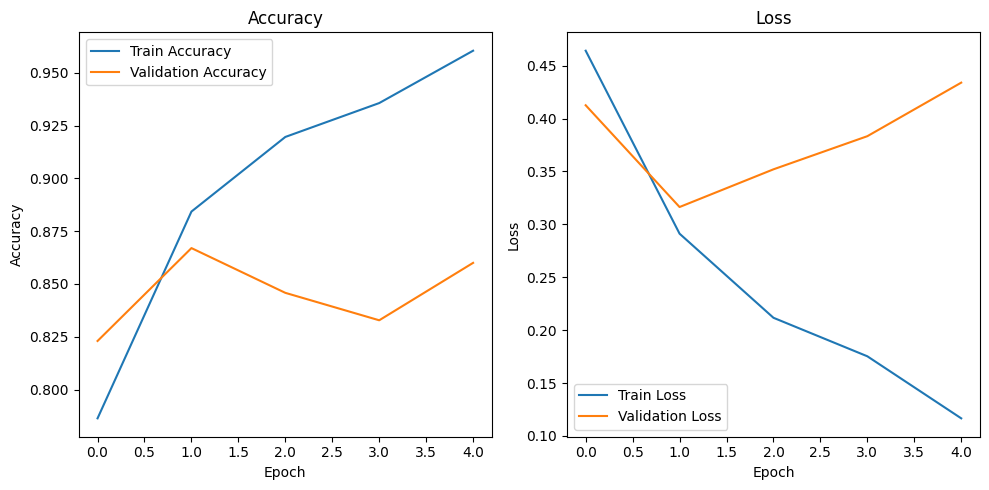

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original Review: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Predicted Sentiment: Positive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.sequence import pad_sequences

# 1. Load the IMDB dataset
max_features = 10000  # Use the top 10,000 most frequent words
max_len = 200  # Cut reviews after 200 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 2. Pad sequences to ensure uniform length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# 3. Build the LSTM model
model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=max_len),
    LSTM(units=64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: Positive or Negative
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# 4. Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

# 5. Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# 6. Visualize training history
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 7. Test with a custom review (Optional)
# Decode IMDB review back to text (for understanding custom reviews)
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Example
custom_review = x_test[0]  # First review in the test set
print(f"Original Review: {decode_review(custom_review)}")
print(f"Predicted Sentiment: {'Positive' if model.predict(custom_review.reshape(1, -1))[0][0] > 0.5 else 'Negative'}")


In [4]:
print(decode_review(custom_review))

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss
